<h2 align=center>Data Visalization with Seaborn: Feature Selection and Classification</h2>
<img src="https://storage.googleapis.com/kaggle-datasets-images/180/384/3da2510581f9d3b902307ff8d06fe327/dataset-cover.jpg">

### Task 1: Loading Libraries and Data

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import time

In [46]:
df = pd.read_csv('data.csv')

<h2 align=center> Exploratory Data Analysis </h2>

---

In [47]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Determining the shape of dataset (No. of Observations and No. of Attributes)

In [48]:
print("No. of Instances:", df.shape[0])
"\n"
print("No. of Fields:", df.shape[1])

No. of Instances: 569
No. of Fields: 33


### List of Columns' Names

In [49]:
col = list(df.columns)       
print(col)

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

From **info** method, it's evident that the column: 'Unnamed: 32' is completely null. Therefore, this column needs to be dropped. Next, the id column has no significance with the breast cancer except it can only be used as an index column, otherwise it should be dropped also.

Moreover, it is evident that the atribute: **Diagnosis** is the target variable. So, from here it's clear that except the columns': **Diagnosis**, **id**, and **Unnamed: 32**, all the columns are features, and the **Diagnosis** is the target variable.

### Separate Target from Features

In [51]:
target = df.diagnosis                           
drop_cols = ['Unnamed: 32', 'id', 'diagnosis']
features = df.drop(drop_cols, axis = 1)
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Checking the data types of attributes

In [9]:
features.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [10]:
target.unique()

array(['M', 'B'], dtype=object)

### Plot Diagnosis Distributions

Number of Benign:  357
Number of Malignant :  212


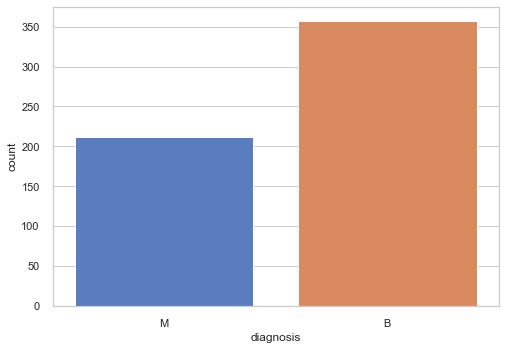

In [52]:
ax = sns.countplot(x=target, label="Count")
B, M = target.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

### Summary Statistics

In [12]:
features.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Feature Scaling**

The goal of applying Feature Scaling is to make sure features are on almost the same scale so that each feature is equally important and make it easier to process by most ML algorithms.

<h2 align=center> Data Visualization </h2>

---

### Visualizing Standardized Data with Seaborn

**Violin plots for first 10 features**

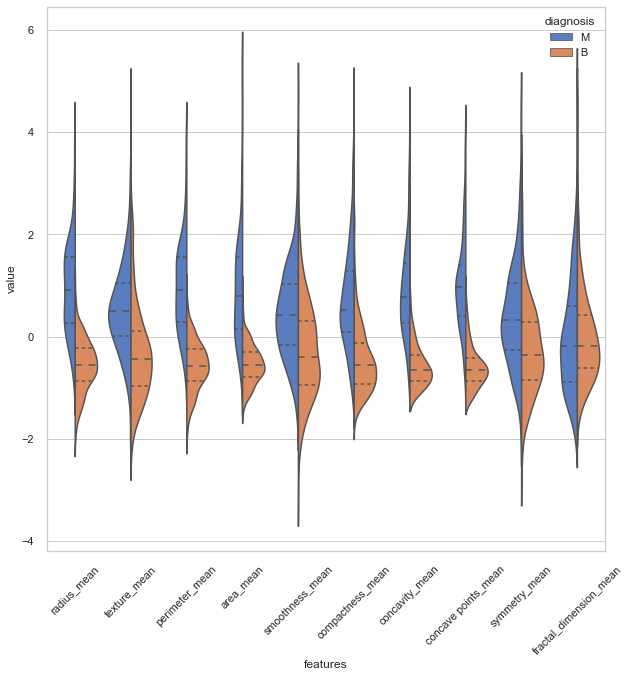

In [65]:
# Data Standardization
labels = target
data = features
std_data = (data - data.mean()) / (data.std())

# concat labels with standardized data (std_data)
dc1 = pd.concat([labels, std_data.iloc[:, 0:10]],axis=1)

# convert wide-spread data into long-spread format
pvt_1 = pd.melt(dc1, id_vars = "diagnosis",
                    var_name = "features",
                    value_name = 'value')

# violin plot to visualize the standardized features
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=pvt_1, split=True, inner="quart")
plt.xticks(rotation=45);

**Violin plots for the second 10 features**

In [64]:
# concat the next 10 features with corresponding labels
dc2 = pd.concat([labels, std_data.iloc[:, 10:20]], axis=1)

# convert to pivot table
pvt_2 = pd.melt(data, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

# violin plots of the seond 10 features
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=pvt_2, split=True, inner="quart")
plt.xticks(rotation=45);

KeyError: 'diagnosis'

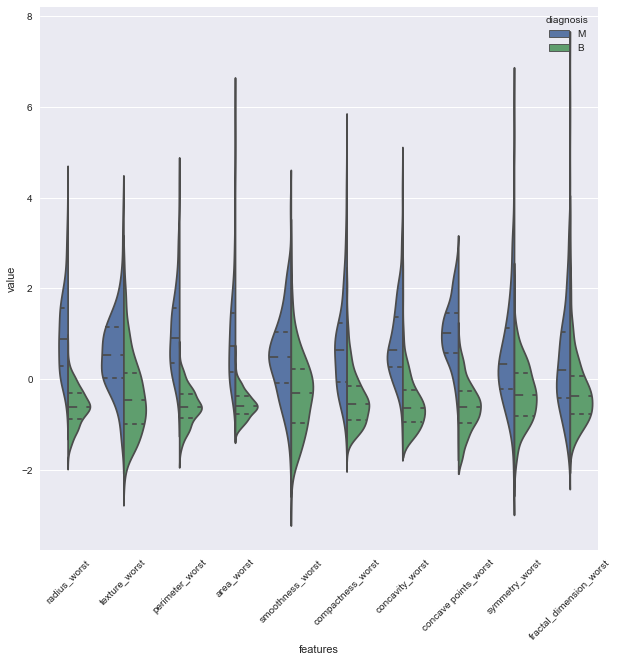

In [17]:
data = pd.concat([target, data_n_2.iloc[:,20:31]], axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=45);

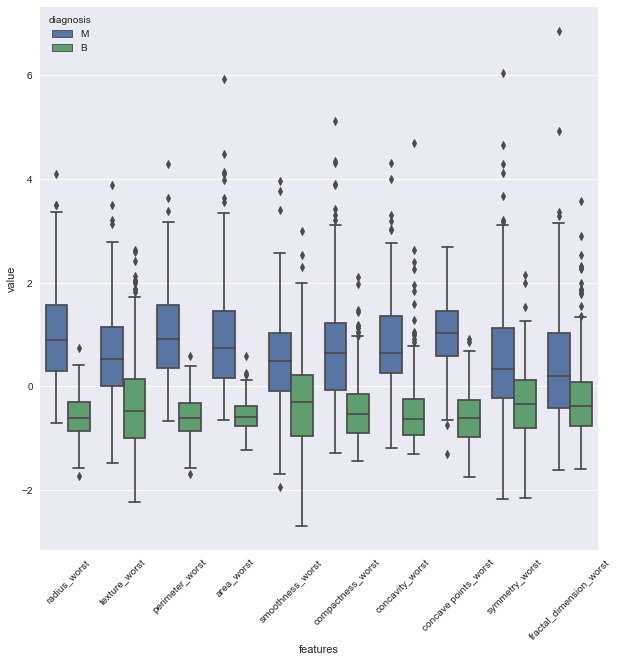

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=45);

### Using Joint Plots for Feature Comparison

c:\Users\scs\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


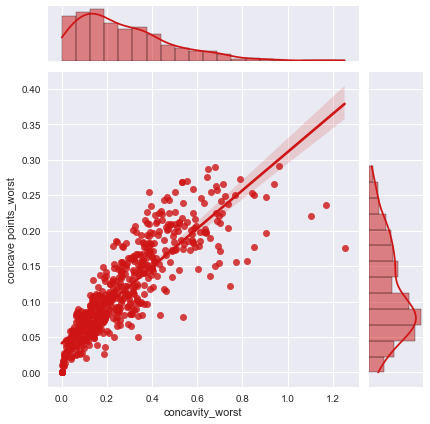

In [19]:
sns.jointplot(features.loc[:, 'concavity_worst'],
              features.loc[:,'concave points_worst'],
              kind="reg",
              color="#ce1414");

###  Observing the Distribution of Values and their Variance with Swarm Plots

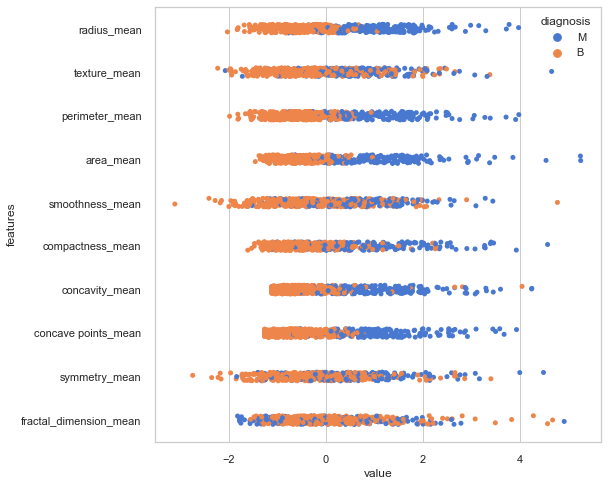

In [20]:
sns.set(style="whitegrid", palette="muted")
data_dia = target
data = features
data_n_2 = (data - data.mean()) / (data.std())  
data = pd.concat([target, data_n_2.iloc[:,0:10]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
                     var_name="features",
                     value_name='value')
plt.figure(figsize=(8,8))
sns.stripplot(y="features", x="value", hue="diagnosis", data=data, size=5)
plt.xticks(rotation=0);

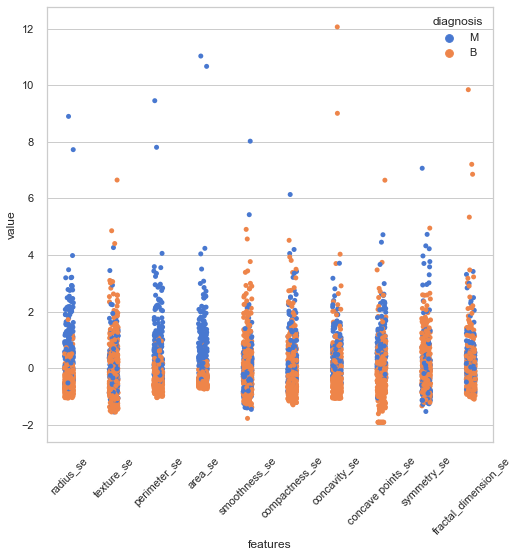

In [21]:
data = pd.concat([target, data_n_2.iloc[:,10:20]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
                     var_name="features",
                     value_name='value')
plt.figure(figsize=(8,8))
sns.stripplot(x="features", y="value", hue="diagnosis", data=data, size=5)
plt.xticks(rotation=45);

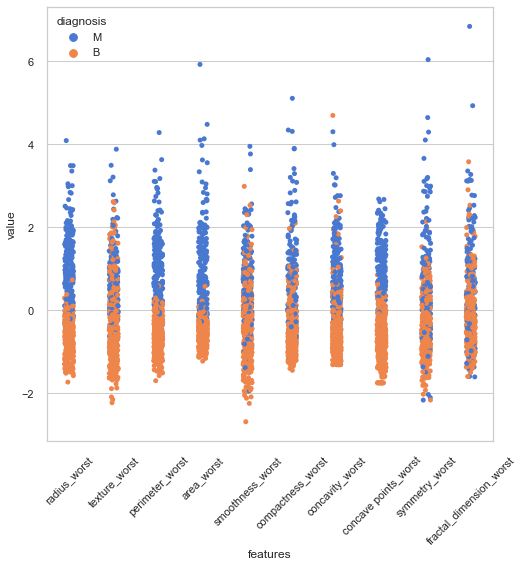

In [22]:
data = pd.concat([target, data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data, id_vars="diagnosis",
                     var_name="features",
                     value_name='value')
plt.figure(figsize=(8,8))
sns.stripplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=45);

### Observing all Pair-wise Correlations

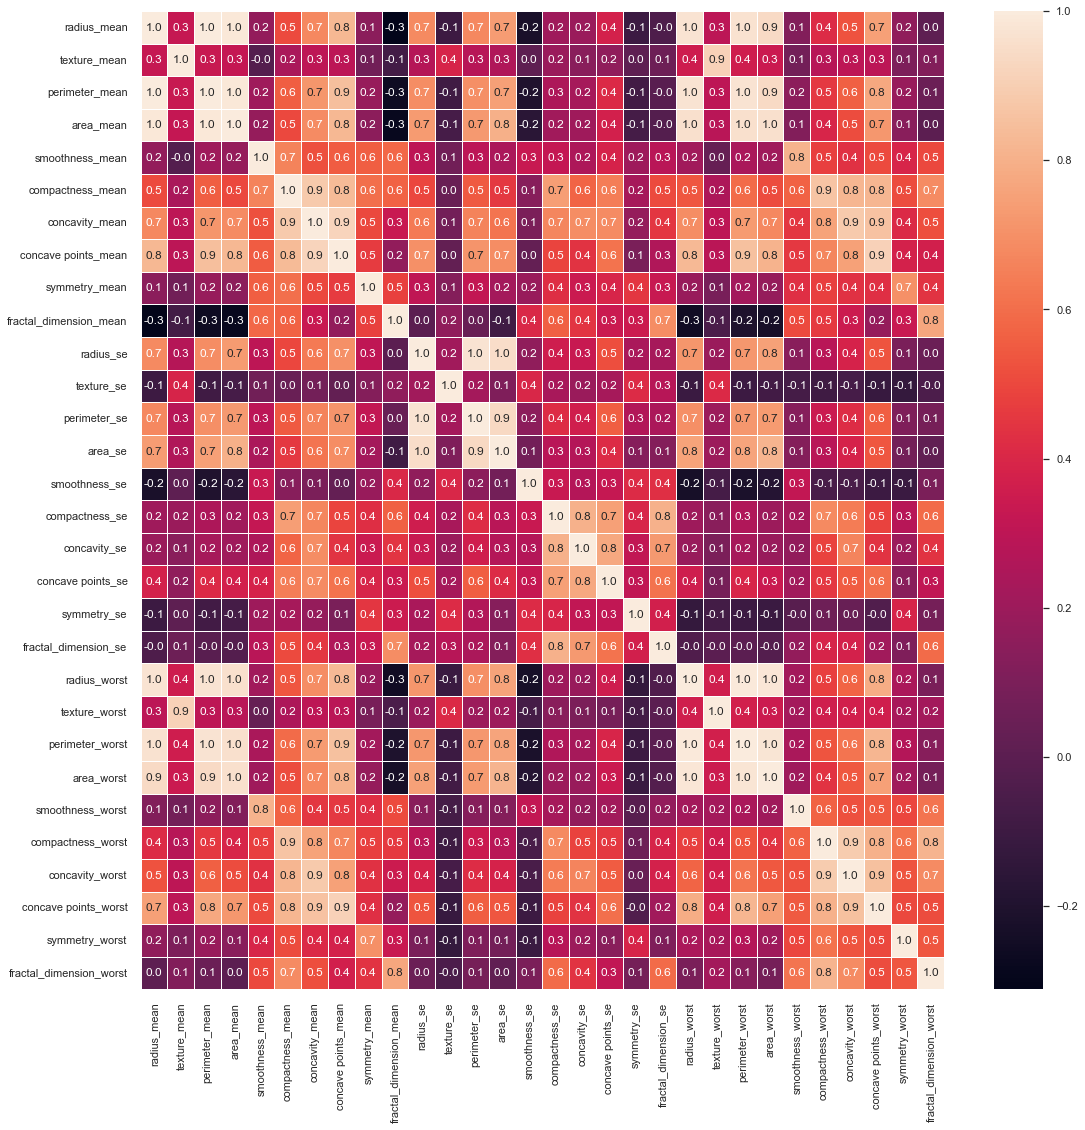

In [23]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(features.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax);

### Task 2: Dropping Correlated Columns from Feature Matrix
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All\n",
***

In [24]:
'''['perimeter_mean','radius_mean','compactness_mean',
              'concave points_mean','radius_se','perimeter_se',
              'radius_worst','perimeter_worst','compactness_worst',
              'concave points_worst','compactness_se','concave points_se',
              'texture_worst','area_worst']'''

"['perimeter_mean','radius_mean','compactness_mean',\n              'concave points_mean','radius_se','perimeter_se',\n              'radius_worst','perimeter_worst','compactness_worst',\n              'concave points_worst','compactness_se','concave points_se',\n              'texture_worst','area_worst']"

### Task 3: Classification using XGBoost (minimal feature selection)

In [25]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

Since the ML model accepts only numerical variables, therefore it's necessary to covert our target variable (i.e diagnosis = M or B) into 0 and 1 codes. These values are called **Dummy Variables**, and the method is called Dummy Encoding or One Hot Encoding.

Ref: <https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/#h2_8>

In [26]:
dummies = pd.get_dummies(target)
dummies

,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
564,0,1
565,0,1
566,0,1
567,0,1


In [42]:
dummy_var = dummies.drop(['B'], axis=1)
dummy_var

,M
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [43]:
dummy_var.groupby('M').agg({'M': 'count'})

,M
M,
0,357
1,212


In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, dummy_var, test_size=0.3, random_state=42)
clf_1 = xgb.XGBClassifier(random_state=42).fit(X_train, y_train)

In [30]:
print('Accuracy Score:', accuracy_score(y_test, clf_1.predict(X_test)))

Accuracy Score: 0.9824561403508771


<AxesSubplot:>

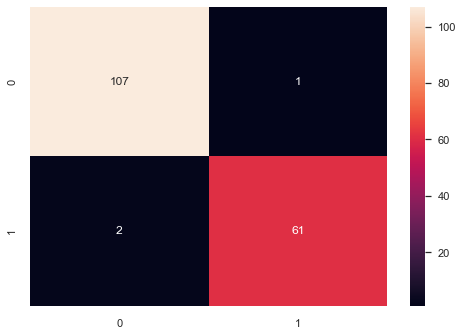

In [31]:
cm = confusion_matrix(y_test, clf_1.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d')

**Using sklearn OneHotEncoder**

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

te = le.fit_transform(target)
target_encoded = pd.DataFrame(te, columns=['diagnosis'])
target_encoded

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [33]:
target_encoded.groupby('diagnosis').agg({'diagnosis': 'count'})

,diagnosis
diagnosis,
0,357
1,212


Let's try to train the xgboost model with target encoded by one hot encoding method.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.3, random_state=42)
clf_2 = xgb.XGBClassifier(random_state=42).fit(X_train, y_train)

In [35]:
print('Accuracy Score:', accuracy_score(y_test, clf_2.predict(X_test)))

Accuracy Score: 0.9824561403508771


<AxesSubplot:>

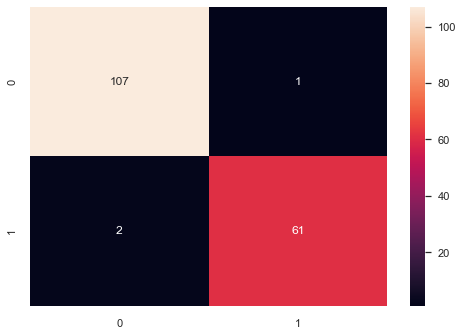

In [36]:
cm = confusion_matrix(y_test, clf_2.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d')

Hence the results are same with both encoding methods.

### Task 4: Univariate Feature Selection and XGBoost

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [38]:
select_features = SelectKBest(chi2, k=10).fit(X_train, y_train)

print("Score List:", select_features.score_)

AttributeError: 'SelectKBest' object has no attribute 'score_'

In [ ]:
print('Features List:', X_train.columns)

In [ ]:
X_train_2 = select_features.transform(X_train)

X_test_2 = select_features.transform(X_test)


In [ ]:
clf_2 = xgb.XGBClassifier().fit(X_train_2, y_train)

In [ ]:
print('Accuracy Score:', accuracy_score(y_test, clf_2.predict(X_test_2)))

In [ ]:
cm_2 = confusion_matrix(y_test, clf_1.predict(X_test))

sns.heatmap(cm_2, annot=True, fmt='d')

### Task 5: Recursive Feature Elimination with Cross-Validation

In [ ]:
from sklearn.feature_selection import RFECV

clf_3 = xgb.XGBClassifier()

rfecv = RFECV(estimator=clf_3, step=1, cv=5, scoring='accuracy', n_jobs=-1).fit(X_train, y_train)

print("Optimal No. of Features", rfecv.n_features_)
print("Best Features:", X_train.columns[rfecv.support_])

In [ ]:
print("Accuracy Score", accuracy_score(y_test, rfecv.predict(X_test)))

In [ ]:
num_features = [i for i in range(1, len(rfecv.grid_scores_) + 1)]
cv_scores = rfecv.grid_scores_
ax = sns.lineplot(x=num_features, y=cv_scores)
ax.set(xlabel='No. of Selected Features', ylabel='CV Scores')

### Task 6: Feature Extraction using Principal Component Analysis

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Data normalization
X_train_norm = (X_train - X_train.mean()) / (X_train.max() - X_train.min())
X_test_norm = (X_test - X_test.mean()) / (X_test.max() - X_test.min())

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(X_train_norm)
plt.figure(1, figsize=(10,8))
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio))
plt.xlabel("No. of Components")
plt.ylabel("Commulative Explained Variance")